In [85]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

In [86]:
plt.style.use("ggplot")

In [87]:
# Sample from two units circles, which start having origin at (+- centre, 0)
# and merge to become a figure of 8 by their radii expanding

def sample(size, centre):
    assert centre > 0

    radius = np.linspace(centre / 2, centre, size)
    theta = 2 * np.pi * np.random.random(size)
    centre_x = np.tile([centre, -centre], 1 + size // 2)[:size]

    x, y = centre_x + radius * np.cos(theta), radius * np.sin(theta)
    sample = np.column_stack((x, y))

    return sample

In [88]:
size = 1000
centre = 2

In [89]:
ts = sample(size, centre)

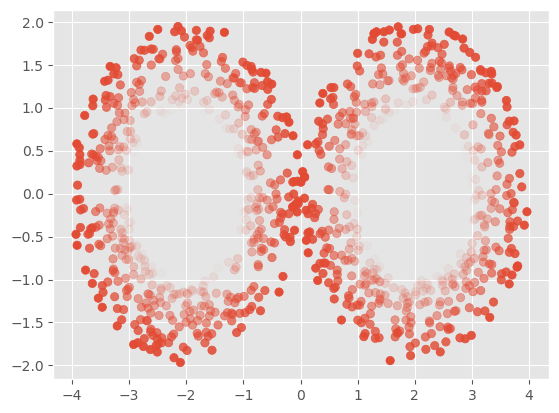

In [90]:
alpha_values = np.linspace(0, 1, size)
plt.scatter(ts[:, 0], ts[:, 1], alpha=alpha_values)

Expect to see two H_0 and two H_1 bars which merge at some point in time 

In [91]:
rips_complex = gd.RipsComplex(points=ts, max_edge_length=1)

In [92]:
st = rips_complex.create_simplex_tree(max_dimension=1)

In [93]:
# Returns list of indices
filtration = [sigma for sigma, _ in st.get_filtration()]

In [94]:
from gtda.time_series import SlidingWindow

In [95]:
window_size = 50

SW = SlidingWindow(size=window_size)

ts_window = SW.fit_transform(ts)

In [96]:
# Filtration based on if simplex observed in sliding window
appearances = [sigma for sigma in filtration if sigma[-1] - sigma[0] <= window_size]
times = [[max(0, sigma[-1] - window_size + 1), sigma[0] + 1] for sigma in appearances]

In [97]:
import dionysus as d

In [98]:
f = d.Filtration(appearances)

In [99]:
zz, dgms, cells = d.zigzag_homology_persistence(f, times)

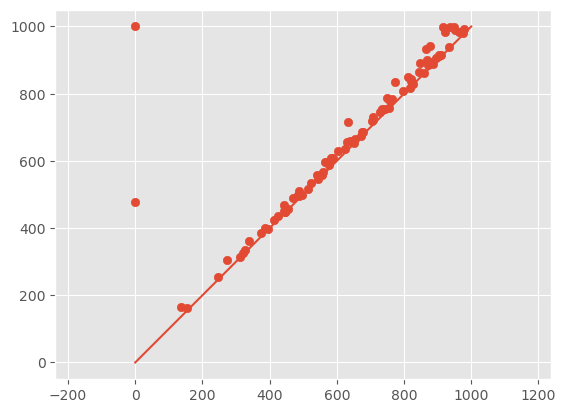

In [100]:
# Correct result up to noise
d.plot.plot_diagram(dgms[0])

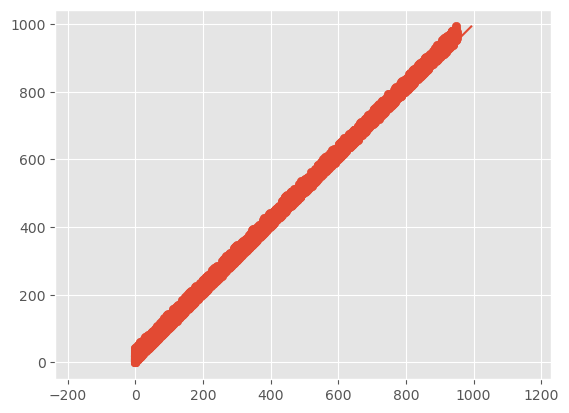

In [101]:
# Doesn't capture the data the way I expected
d.plot.plot_diagram(dgms[1])

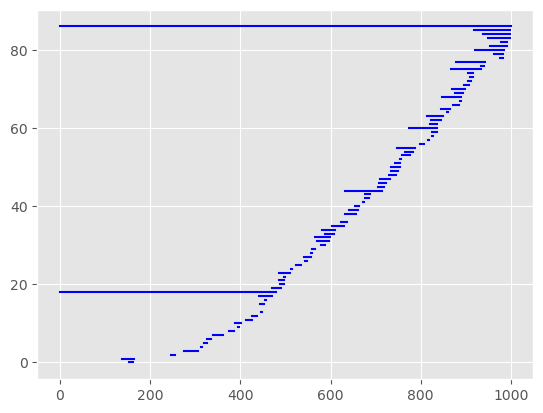

In [102]:
d.plot.plot_bars(dgms[0])

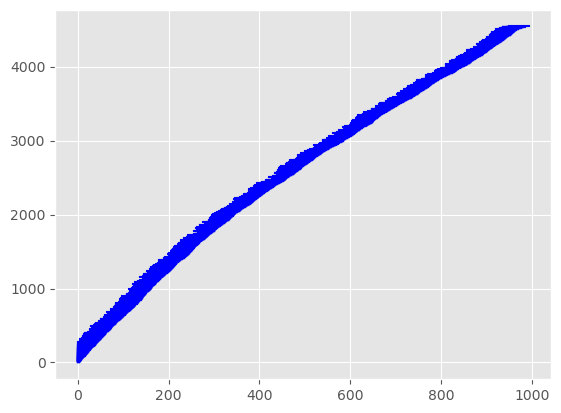

In [103]:
d.plot.plot_bars(dgms[1])